# Example of XOR gate using an MLP and MLP class

## Author: Ithallo Junior Alves Guimarães

### Apr/2018

#####  Reference:     <http://iamtrask.github.io/2015/07/12/basic-python-network/>
 

In [1]:
import numpy as np
import datetime

In [2]:
class mlp():
    def __init__(self, hidden_layer_size=3, activation="tanh", alpha=0.1, max_iter=1000, bias=True,  
                 tol=1e-3, seed=None, keep_error_list=True, warm_start=False, coefs=None):
        self.hidden_layer_size = hidden_layer_size
        self.activation = activation
        self.alpha = alpha
        self.max_iter = max_iter
        self.bias = bias
        self.tol = tol
        self.seed = seed
        self.keep_error_list = keep_error_list
        self.error_list = []
        self.warm_start = warm_start
        self.coefs = coefs
        self.error = 0
        self.X = np.array([[0, 0],[0, 1], [1, 0], [1, 1]])
        self.y = np.array([0, 1, 1, 0])

    # activaton function
    def _function(self, X, deriv=False):
        if self.activation=="tanh":
            if(deriv==True):
                return 1. - np.square(np.tanh(X))
            else: return np.tanh(X)
        
        elif self.activation=="sigmoid":
            if(deriv==True):
                out = self._function(X)
                return out * (1. - out ) 
            else:  return 1./(1+np.exp( -X ))
        
        elif self.activation=="linear":
            if(deriv==True):
                return 1.
            else:
                return X
        elif self.activation=="softplus":
            if(deriv==True):
                return  1./(1+np.exp( -X ))
            else:
                return  np.log(1 + np.exp(X))

        
    
    # corrects the  shape of y
    def _y_shape_corrector(self, y):
            if type(y) == list:
                    self._y_shape_corrector(np.array(y))
            else:
                if len(y.shape)==1:
                    return y.reshape(-1,1)
                else:
                    return y
    
    # creates the internal structure of the network
    def _network_constructor(self, X_, y_):
        
        #checks if there is a warm start
        if self.warm_start and (self.coefs != None):
            self.coefs = coefs
        else:
            
            # inicialize with a deterministic seed is a good practice
            np.random.seed(self.seed)
            
            #bias
            if self.bias:
                l0 = X_.shape[-1] + 1
            else:
                l0 = X_.shape[-1]
                
            #cosntructing layers with weights randomly with mean 0
            hidden_layers = 2*np.random.random((l0, self.hidden_layer_size)) - 1.
            output_layer = 2*np.random.random((self.hidden_layer_size, y_.shape[-1])) - 1.
 
            self.coefs = [hidden_layers, output_layer]
    # run
    def fit(self, X, y):
        
        #cleaning error list 
        self.error_list = []
        
        #correcting the shape of y and adding bias to X
        y = self._y_shape_corrector(y)
        
        #calling the constructor, must be after shape correction
        self._network_constructor(X, y)
        #print self.coefs
        
        #bias in the network, if needed and creating the layer 0
        if self.bias:
            layer0 = np.hstack((X, np.ones((X.shape[0], 1))))
        else:
            layer0 = X
       
        st = datetime.datetime.now()
        print "Starting MLP at:", st
        for i in xrange(self.max_iter):
            
            #training
            self._train(layer0, y)
            
            #error list, if any
            if self.keep_error_list:
                self.error_list.append(self.error)
            
            # stopping by error
            if self.error < self.tol:
                print "Stopping by error at", i
                break
            
        ed = datetime.datetime.now()
        print "Finishing MLP training at:", ed
        print "Final error:", self.error
        print "It took %s"%(ed - st) 
        
    #trains, already receives the layer0, later maybe will add more training functions
    def _train(self, layer0, y):
        #backprogation
        
        #calculating first layer
        sum_layer1 = np.dot(layer0, self.coefs[0])
        layer1 = self._function(sum_layer1)
        #calculating for the hidden
        sum_layer2 = np.dot(layer1, self.coefs[1])
        layer2 = self._function(sum_layer2)

        #error to the target value
        l2_error =   y - layer2 
        
        #slope for hidden
        l2_delta =  l2_error * self._function(sum_layer2, deriv=True)
        
        #contribuiton to the second from the first
        l1_error = np.dot(l2_delta, self.coefs[1].T)
        
        # slope of the sigmoid at the values in layer 1
        l1_delta =  l1_error * self._function(sum_layer1, deriv=True)
    
        
        ##updating all weights and setting the error as mean squared error
        self.coefs[1] = self.coefs[1] + self.alpha * np.dot(layer1.T, l2_delta)
        self.coefs[0] = self.coefs[0] + self.alpha * np.dot(layer0.T, l1_delta)
        self.error = 0.5 * np.square(l2_error).sum()
    
    #predicts output after fitting a model, supposes the coefs are known    
    def predict(self, X):
        
        #bias in the network, if needed
        if self.bias:
            layer0 = np.hstack((X, np.ones((X.shape[0], 1))))
        else:
            layer0 = X
        
        layer1 = self._function(np.dot(layer0, self.coefs[0]))
        
        layer2 = self._function(np.dot(layer1, self.coefs[1]))      
        
        return layer2
    
    #calculates the score using 1 - mean square error
    def score(self, X, y):     
        #correcting the shape of y
        y = self._y_shape_corrector(y)
        y_ = self.predict(X)
        se = 0.5 * np.square(y - y_).sum()
        return float(1. - se)
    
    #Showing it working, example_run
    def example_run(self, plot=True):
        self.fit(self.X, self.y)
        print"Results:\n"
        print " X    y    Predicted"
        results = clf.predict(self.X)
        for i in xrange(4):
            print self.X[i],self.y[i], results[:,0][i]
        print"\nscore: %.3f%%"%(self.score(self.X,self.y)*100)
        
        if plot:
            import matplotlib.pyplot as plt
            plt.plot(self.error_list)
            plt.title("Squared Error per generation")
            plt.xlabel("Generation")
            plt.ylabel("Squared Error")
            plt.show()

## Examples


#### Using sigmoid

Starting MLP at: 2018-05-07 13:45:17.274252
Finishing MLP training at: 2018-05-07 13:45:17.742977
Final error: 0.00378037824044
It took 0:00:00.468725
Results:

 X    y    Predicted
[0 0] 0 0.0349913383061
[0 1] 1 0.954790641348
[1 0] 1 0.962021370068
[1 1] 0 0.0533727411107

score: 99.622%


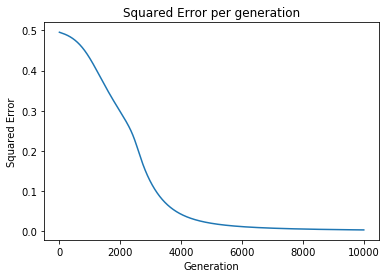

CPU times: user 868 ms, sys: 74.8 ms, total: 943 ms
Wall time: 1.03 s


In [3]:
clf = mlp(seed=1, activation="sigmoid", max_iter=10000, 
          hidden_layer_size=4, alpha=0.1, tol=1e-3)
%time clf.example_run()   

#### Using tanh

Starting MLP at: 2018-05-07 13:45:18.310348
Stopping by error at 1164
Finishing MLP training at: 2018-05-07 13:45:18.397661
Final error: 0.000999217420691
It took 0:00:00.087313
Results:

 X    y    Predicted
[0 0] 0 0.00112584266483
[0 1] 1 0.964411543683
[1 0] 1 0.973118901463
[1 1] 0 0.00240969205842

score: 99.900%


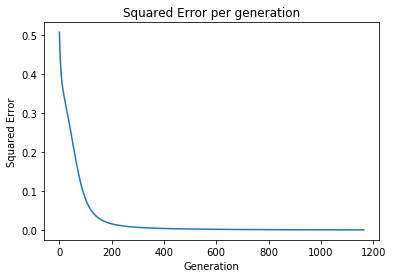

CPU times: user 257 ms, sys: 8.86 ms, total: 266 ms
Wall time: 282 ms


In [4]:
clf = mlp(seed=1, activation="tanh", max_iter=10000, 
          hidden_layer_size=4, alpha=0.1, tol=1e-3)
%time clf.example_run()   

#### Using linear

Starting MLP at: 2018-05-07 13:45:18.601158
Finishing MLP training at: 2018-05-07 13:45:18.850148
Final error: 0.5
It took 0:00:00.248990
Results:

 X    y    Predicted
[0 0] 0 0.5
[0 1] 1 0.5
[1 0] 1 0.5
[1 1] 0 0.5

score: 50.000%


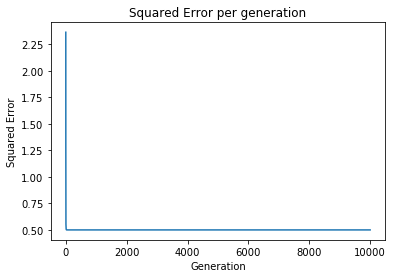

CPU times: user 425 ms, sys: 8.61 ms, total: 434 ms
Wall time: 437 ms


In [5]:
clf = mlp(seed=1, activation="linear", max_iter=10000, 
          hidden_layer_size=4, alpha=0.1, tol=1e-3)
%time clf.example_run()   

#### Using softplus

Starting MLP at: 2018-05-07 13:45:19.048055
Stopping by error at 2357
Finishing MLP training at: 2018-05-07 13:45:19.151201
Final error: 0.000999532746936
It took 0:00:00.103146
Results:

 X    y    Predicted
[0 0] 0 0.029591420851
[0 1] 1 0.998144243488
[1 0] 1 0.998795651237
[1 1] 0 0.0334232394392

score: 99.900%


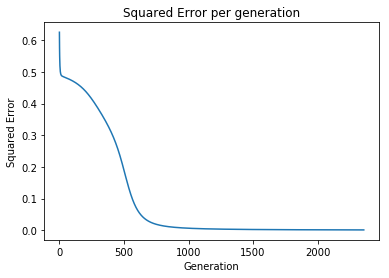

CPU times: user 799 ms, sys: 56 ms, total: 855 ms
Wall time: 1.01 s


In [6]:
clf = mlp(seed=1, activation="softplus", max_iter=10000, 
          hidden_layer_size=4, alpha=0.1, tol=1e-3)
%time clf.example_run()  